In [32]:
class City:
    def __init__(self, country_code, name, region, population, latitude, longitude):
        self.countryCode = country_code
        self.name = name
        self.region = region
        self.population = int(population)
        self.latitude = float(latitude)
        self.longitude = float(longitude)

    def __str__(self):
        return "{},{},{},{}".format(self.name,
                                    self.population,
                                    self.latitude,
                                    self.longitude,
                                    )

    def get_population(self):
        return self.population

    def get_latitude(self):
        return self.latitude

    def get_name(self):
        return self.name

In [33]:
# Performs the quicksort algorithm.

# Partition the sublist the_list[p ... r] so that the pivot
# (originally in the_list[r]) moves to the_list[q],
# all items in the_list[p ... q-1] are less than or equal to the pivot,
# and all items in the_list[q+1 ... r] are greater than the pivot.
# Return the index q where the pivot ends up.
def partition(the_list, p, r, compare_func):
    pivot = the_list[r]
    
    # Set up the indices i and j so that
    #    the_list[p ... i] contains items <= pivot,
    #    the_list[i+1 ... j-1] contains items > pivot, and
    #    the_list[j ... r-1] contains items not yet compared with the pivot.
    i = p - 1
    j = p
    while j < r:
        if compare_func(the_list[j], pivot):
            # Move this item into the section known to be <= pivot.
            i += 1
            (the_list[i], the_list[j]) = (the_list[j], the_list[i])
        j += 1
            
    # Get the pivot into the correct position.
    (the_list[i+1], the_list[r]) = (the_list[r], the_list[i+1])
    return i+1

# Sort the sublist the_list[p ... r] using the quicksort algorithm.
def quicksort(the_list, p, r, compare_func):
    if p < r:   # nothing to do if the sublist has fewer than 2 items
        q = partition(the_list, p, r, compare_func) # divide
        quicksort(the_list, p, q-1, compare_func)   # conquer smaller items
        quicksort(the_list, q+1, r, compare_func)   # conquer larger items

# Sort the_list by running quicksort on it.        
def sort(the_list, compare_func):
    quicksort(the_list, 0, len(the_list)-1, compare_func)

# Return True if city1 has the same or higher population than city2.
def compare_population(city1, city2):
    return city1.get_population() >= city2.get_population()

# Return True if city1 comes at or before city2 alphabetically.
def compare_name(city1, city2):
    return city1.get_name().lower() <= city2.get_name().lower()

# Return True if city1's latitude is less than or equal to city2's latitude.
def compare_latitude(city1, city2):
    return city1.get_latitude() <= city2.get_latitude()


In [34]:
with open('../data/world_cities.txt', 'r') as file:
    data = file.read()

data = data.split('\n') # first split by line
cities = []
for line in data:
    cities.append(line.split(',')) # then split by comma

for i in range(len(cities)):
    try:
        cities[i] = City(cities[i][0], # country_code
                         cities[i][1], # name
                         cities[i][2], # region
                         cities[i][3], # population
                         cities[i][4], # latitude
                         cities[i][5], # longitude
                         )
    except:
        print('ERROR - line: ', i+1)

In [ ]:
# sort alphabetically
sort(cities, compare_func=compare_name)
with open("../data/cities_alpha.txt", "w") as file:
    for city in cities:
        file.write(str(city) + '\n')


In [ ]:
# sort by latitude, south to north
sort(cities, compare_func=compare_latitude)
with open("../data/cities_latitude.txt", "w") as file:
    for city in cities:
        file.write(str(city) + '\n')

In [ ]:
# sort by population, most to least
sort(cities, compare_func=compare_population) # sorting by population last since we want 30 most populous cities in next step.
with open("../data/cities_population.txt", "w") as file:
    for city in cities:
        file.write(str(city) + '\n')

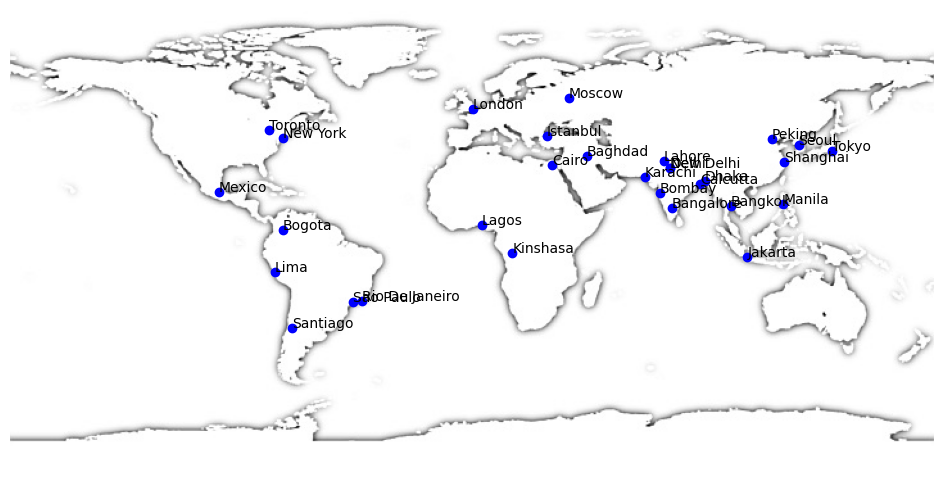

In [ ]:
import matplotlib.pyplot as plt
import time
import IPython.display

WIDTH = 720 # image (world.png) width
HEIGHT = 360 # image height
DPI = 60 # display image at this dots-per-inch resolution
n = 30 # print n most populous cities

# Convert a latitude and longitude to pixel locations.
# WIDTH & HEIGHT should be defined to be the size of the image (in pixels)
def longlat_to_pixel(latitude, longitude):
    center_x = int(round((WIDTH / 2) + (WIDTH / 2) * (longitude / 180)))
    center_y = HEIGHT - int(round((HEIGHT / 2) + (HEIGHT / 2) * (latitude / 90)))
    return (center_x, center_y)

def persist_coordinates(i):
        for j in range(i):
            #print(cities[j].get_name()) # shows city name being printed
            plt.plot(coordinates[j][0], coordinates[j][1], 'bo')
            plt.text(coordinates[j][0], coordinates[j][1], cities[j].get_name())
            
coordinates = []
for city in cities[:n]:
    coordinates.append(longlat_to_pixel(city.latitude, city.longitude))

img = plt.imread("../data/world.jpg")
#plt.plot(120, 100, 'bo') # plot one blue data point
for i in range(n+1):
    plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))
    plt.imshow(img) # Display the image
    plt.axis('off')
    #print(i) # shows which city number is being printed
    persist_coordinates(i)
    time.sleep(0.5)
    IPython.display.clear_output(wait=True)
    plt.show()